In [1]:
import py_wave_runup
from examples.evaluate_returnperiods import load_scenario_data, load_timeseries_data
import sys
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import py_wave_runup
import seaborn as sns


In [2]:
#Run this if you want to compare different scenarios and return periods
#=========================================================
#Wave Dataset
#=========================================================
Tp_returnvals = pd.read_csv('data\Tp_return_vals.csv')
Tp=np.reshape(Tp_returnvals.drop(columns='return period').values, (15,))
Hs_returnvals = pd.read_csv('data\Hs_return_vals.csv')
Hs=np.reshape(Hs_returnvals.drop(columns='return period').values, (15,))
returnperiod = [5]*3 + [10] * 3 + [20]*3 + [50]*3 + [100]*3
MHW = 4.3#m
#=========================================================
#Slope Info Dataset
#=========================================================
scenario = 'data\Adamson_M_Z_scenarios.csv'
df = load_scenario_data(scenario, Hs, Tp, returnperiod)

In [3]:
# #Run this if you want to run time series
# df = load_timeseries_data('data\Hs_ts.csv','data\Tp_ts.csv', dtoe=2, slope=1/10)
# df.bsand = 1/100

In [4]:
df_stock = df.copy(deep=True)
print(df_stock.scenario.unique())
df_stock = df_stock.loc[(df_stock.scenario == 1) | (df_stock.scenario==2)]
print(df_stock.scenario.unique())
df = df.loc[(df.scenario==3) | (df.scenario==4)]
print(df.scenario.unique())

blen = py_wave_runup.models.Blenkinsopp2022(Hs=df.hs,beta=df.beta,bsand=df.bsand,bberm=df.bberm,dtoeSWL=df.dtoeSWL,Tp=df.tp,spectral_wave_period=True,h=10)
euro = py_wave_runup.models.EurOtop2018(Hs=df.hs,beta=df.beta,bsand=df.bsand,bberm=df.bberm,dtoeSWL=df.dtoeSWL,Tp=df.tp,spectral_wave_period=True,h=10)
poate = py_wave_runup.models.Poate2016(Hs=df.hs,beta=df.beta,bsand=df.bsand,bberm=df.bberm,dtoeSWL=df.dtoeSWL,Tp=df.tp,spectral_wave_period=True,h=10)
stock = py_wave_runup.models.Stockdon2006(Hs=df_stock.hs,beta=df_stock.beta,bsand=df_stock.bsand,bberm=df_stock.bberm,dtoeSWL=df_stock.dtoeSWL,Tp=df_stock.tp,spectral_wave_period=True,h=10)

df_taw = df.copy(deep=True)
df_poate = df.copy(deep=True)

df_stock['r2'] = (stock.R2 + MHW)*3.3
df_stock['method'] = ['Stockdon'] * len(df.hs)

df['r2'] = (blen.R2_eq21+MHW)*3.3
df['method'] = ['Blenkinsopp 2022'] * len(df.hs)

df_taw['r2'] = (euro.R2(gamma_f=0.70)+MHW)*3.3
df_poate['r2'] = (poate.R2()+MHW)*3.3
df_poate['method'] = ['Poate 2016'] * len(df.hs)
df_taw['method'] = ['TAW'] * len(df.hs)


df_full = pd.concat([df, df_taw, df_poate, df_stock])
df_full['hs'] = df_full['hs']*3.3




[1. 2. 3. 4.]
[1. 2.]
[3. 4.]


In [ ]:
#Run this for continuous data plot
# fig, ax = pl.subplots(1,1)
# a = sns.scatterplot(x='hs',y='r2',hue='method',data=df_full)
# pl.legend(loc='upper left')
# ax.set_xlabel('Hs [ft]')
# ax.set_ylabel('R2% [ft]')
# ax.set_xlim((3,8))
# ax.set_ylim((0,10))
# pl.savefig('hsvsr2vsmethod.png')

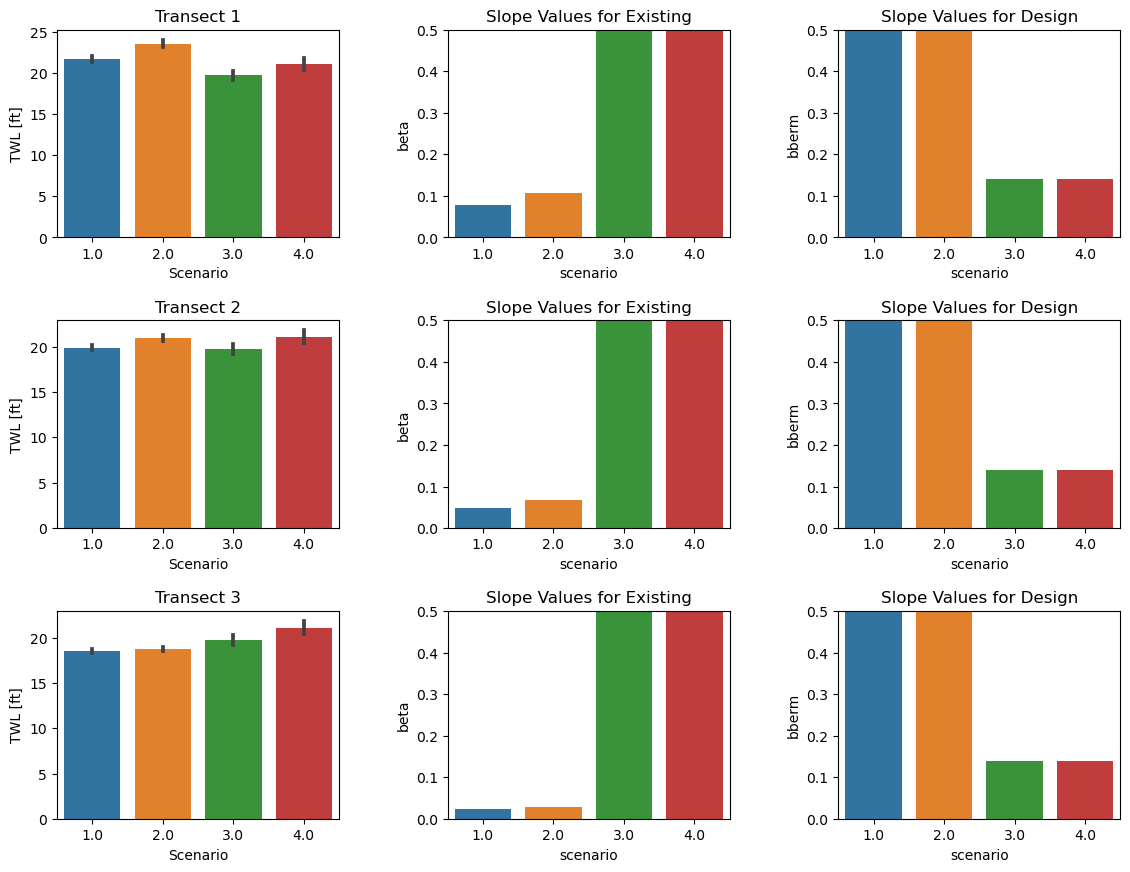

In [13]:
#Run this for scenario plotting
fig, ax = pl.subplots(3,3)
pl.tight_layout()
fig.set_size_inches((12,9))
for i in range(3):
    a = sns.barplot(x='scenario',y='r2', data=df_full[df_full.transect==i+1],ax = ax[i,0])
    sns.barplot(x='scenario',y='beta', data=df_full[df_full.transect==i+1],ax = ax[i,1])
    sns.barplot(x='scenario',y='bberm', data=df_full[df_full.transect==i+1],ax = ax[i,2])
    ax[i,0].set_ylabel('TWL [ft]')
    ax[i,0].set_xlabel('Scenario')
    ax[i,0].set_title('Transect {0}'.format(i+1))
    ax[i,1].set_title('Slope Values for Existing')
    ax[i,2].set_title('Slope Values for Design')
    ax[i,1].set_ylim((0,0.5))
    ax[i,2].set_ylim((0,0.5))